# DeepLearningCode.ipynb

Code exploring various concepts in deep learning.

## Sections

* Tensors
* TensorBoard
* Linear Classification
* Gradient Descent
* Computational Graphs

---

## Tensors

#### General Tensor Operations

In [ ]:
import torch
import numpy as np
from PIL import Image

# Create order 1 tensor w/ 10 zeros.
torch.zeros(10)

# Create order 2 (matrix) tensor.
torch.zeros(3, 3)
torch.zeros([3, 3])

# Create order 4 tensor and inspect size along a given dimension.
T = torch.ones(2, 3, 4, 5)
T.size(2)

# Change shape of a tensor (flatten tensor for viewing).
T = torch.ones(5, 2)
T.view()


#### Broadcasting
* Allows you to effectively combine operations across different tensors.
* Dimension 1 tensors are expanded to match the dimension of the other tensor.

In [ ]:
import torch

# Generate tensor ranging from 0 to 9 and from 0 to 90.
a = torch.arange(10)
b = torch.arange(10) * 10

# Convert a from an order 1 tensor (vector) to order 2 tensor (matrix).
a[None].shape
a[:, None].shape

# Add arbitrarily many dimensions to a tensor.
a[None, :, None, None, None].shape

# Change dimensionality, then index in and remove dimensionality.
c = a[None]
c.shape
c[0, :].shape

# --- Broadcasting ---

# Broadcasting tensors of different shapes together.
# Tensors are replicated along the missing dimension.
torch.ones(3, 1)
torch.ones(1, 3)

torch.ones(3, 1) + torch.ones(1, 3)

# Additional broadcasting example, take tensor from 0-9 and 0-90 and broacast 
# together to create a 10x10 matrix of values from 0-99.
a[None, :] + b[:, None]

# Under the hood, the 0-9 matrix gets expanded along the 1st dimension.
a[None, :].repeat(10, 1)

# The 0-90 matrix gets expanded along the 2nd dimension.
b[:, None].repeat(1, 10)

# The two resultant tensors are then added.

# You can also broadcast with multiplicatin.
a[None, :] + b[:, None]


## TensorBoard
* API for visualizing how a network is training.

In [ ]:
# Install TensorBoard:
# pip install -U tb-nightly
import torch
import os
import numpy as np

# Interface tensorboard with torch.
import torch.utils.tensorboard as tb
import tempfile

# Set working directory to log directory.

# Init tensorboard session.
%tensorboard --reload_interval 1

# Create logger item.
logger = tb.SummaryWriter(os.getcwd(), flush_secs = 1)

# Logging numbers.
logger.add_scalar('first/number', 0, global_step = 0)
logger.add_scalar('first/number', 1, global_step = 1)

logger.add_scalar('first/number2', 0.25, global_step = 0)
logger.add_scalar('first/number2', 0.75, global_step = 1)

# Logging histograms.
logger.add_histogram('first/hist', np.array([1, 3, 4, 2, 2, 2, 1, 2, 2]), global_step = 0)
logger.add_histogram('first/hist2', np.random.rand(100), global_step = 0)
logger.add_histogram('first/hist2', np.random.rand(100), global_step = 1)

# Adding images to TensorBoard.
logger.add_image('first/image', (np.random.rand(3, 100, 100)*255).astype(np.uint8), global_step = 0)

# Adding values with random noise.
for i, x in enumerate(np.random.rand(100)):
    logger.add_scalar('first/noise', x + 0.1*i, global_step = i)


# take the sigmoid of 4
import numpy as np

# define sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

(0 - sigmoid(4)) * -1 * 2

## Linear Classification

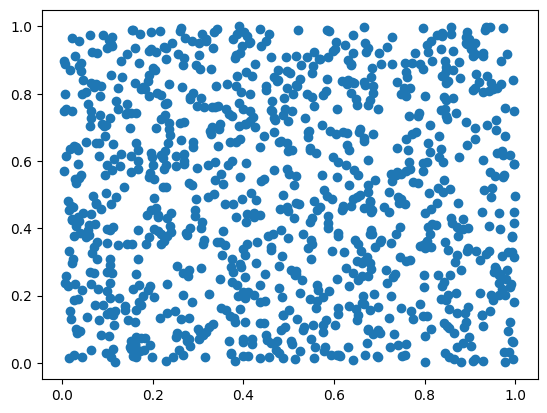

In [1]:
%matplotlib inline

import torch
import matplotlib.pyplot as plt

# Generate random numbers.
x = torch.rand(1000, 2)

# Plot these random numbers.
plt.scatter(x[:, 0], x[:, 1])
plt.show()

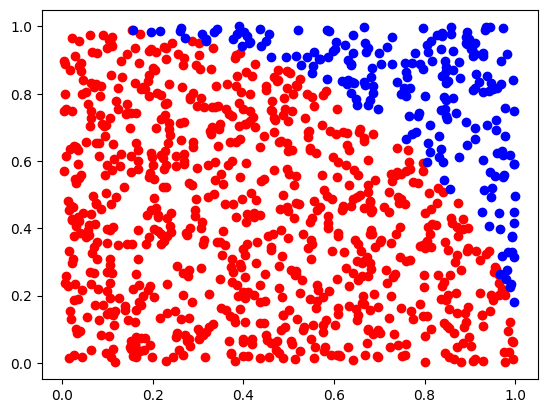

In [3]:
# Check if values of x are inside the unit circle:
x_in_circle = (x**2).sum(1) < 1

# Color points inside circle red, points outside circle blue.
def show(y):
    plt.scatter(x[y, 0], x[y, 1], color = 'red')
    plt.scatter(x[~y, 0], x[~y, 1], color = 'blue')
    plt.show()

show(x_in_circle)

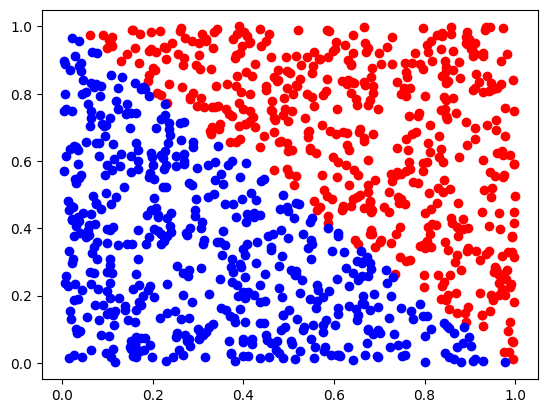

accuracy:  tensor(0.2830)


In [5]:
# Linear classifier weights and bias.
weights = torch.as_tensor([-1, -1], dtype = torch.float)
bias = torch.as_tensor(1.5, dtype = torch.float)

# Linear classifier.
def classify(x, weights, bias):
    logit = (x * weights[None, :]).sum(1) + bias
    return logit > 0

def accuracy(pred_y):
    return (pred_y == x_in_circle).float().mean()

pred_y = classify(x, weights, bias)

# Plot and evaluate accuracy.
show(pred_y)
print('accuracy: ', accuracy(pred_y))

# Blue is predicted to be outside circle (0), red is predicted to be inside 
# circle (1). Default classifier is very poor.

In [ ]:
# Use sigmoid and loss function to improve classifier.

# Linear classifier.
def predict(x, weights, bias):
    logit = (x * weights[None, :]).sum(1) + bias
    return 1 / (1 + (-logit).exp())

# Cross entropy loss function.
def loss(pred_y):
    return -(x_in_circle.float() * (pred_y + 1e-10).log() + (1 - x_in_circle.float()) * (1 - pred_y + 1e-10).log()).mean()

pred_y = predict(x, weights, bias)
print('loss: ', loss(pred_y))
print('accuracy: ', accuracy(pred_y))



## Gradient Descent

In [ ]:
# Gradient descent using torch only.


# Init tensorboard session.
%tensorboard --reload_interval 1

logger = tb.SummaryWriter(os.getcwd(), flush_secs = 1)

# Set weights and bias.
weights = torch.as_tensor([-1, -1], dtype = torch.float)
bias = torch.as_tensor(1.0, dtype = torch.float)

y = x_in_circle.float()

# Gradient descent loop.
for iteration in range(5000):

    # Predict labels and probabilities.
    pred_y = classify(x, weights, bias)
    p_y = predict(x, weights, bias)

    # Compute the loss.
    l = loss(p_y)

    # Perform logging.
    logger.add_scalar('loss', l, global_step = iteration)
    logger.add_scalar('accuracy', accuracy(pred_y), global_step = iteration)

    # Compute gradient.
    gradient_l_f = p_y - y
    gradient_b = gradient_l_f.mean(0)
    gradient_w = (gradient_l_f[:, None] * x).mean(0)

    # Update weights using gradient descent (learning rate set to 0.5).
    weights -= 0.5 * gradient_w
    bias -= 0.5 * gradient_b


## Computational Graphs

In [ ]:
import torch
from torch.nn.parameter import Parameter

x = torch.rand(1000, 2)
x_in_circle = (x**2).sum(1) < 1

def accuracy(pred_labels):
    return (pred_labels == x_in_circle).float().mean()

def show(pred_labels):
    plt.scatter(x[pred_labels, 0], x[pred_labels, 1], color = 'red')
    plt.scatter(x[~pred_labels, 0], x[~pred_labels, 1], color = 'blue')
    plt.show()

def loss(pred_y):
    return -(x_in_circle.float() * (pred_y + 1e-10).log() + (1 - x_in_circle.float()) * (1 - pred_y + 1e-10).log()).mean()

show(x_in_circle)

# Define linear classification class.
class Linear(torch.nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.w = Parameter(torch.ones(input_dim))
        self.b = Parameter(-torch.ones(1))

    def forward(self, x):
        return (x * self.w[None, :]).sum(1) + self.b

# Linear classifier w/ sigmoid.
class LinearClassifier(torch.nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.linear = Linear(input_dim)

    def forward(self, x):
        logit = self.linear(x)
        return 1 / (1 + (-logit).exp())

# Takes in two dimensional input and outputs a single value (sigmoid prediction).
classifier = LinearClassifier(2)

# Detach takes the output from the classifier and detaches it from the computation graph.
classifier(x).detach()

# Test how the classifier does.
show(classifier(x).detach() > 0.5)

# Look at classifier parameters.
list(classifier.parameters())

# --- Gradient Computation on a Computational Graph ---




